<a href="https://colab.research.google.com/github/Amaljayaranga/Constrastive-Loss-Experiments/blob/master/Constrastive_EMNIST_Letters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Extracting ../data/EMNIST/EMNIST/raw/emnist.zip to ../data/EMNIST/EMNIST/raw
Processing byclass
Processing bymerge
Processing balanced
Processing letters
Processing digits
Processing mnist
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:45: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:55: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:50: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:60: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:53: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result eithe

Epoch :  1 Batch :  0 loss :  0.30172961950302124
Epoch :  1 Batch :  100 loss :  0.25724655389785767
Epoch :  1 Batch :  200 loss :  0.31693872809410095
Epoch :  1 Batch :  300 loss :  0.2858419418334961
Epoch :  1 Batch :  400 loss :  0.25024107098579407
Epoch :  1 Batch :  500 loss :  0.25130778551101685
Epoch :  1 Batch :  600 loss :  0.2595089077949524
Epoch :  1 Batch :  700 loss :  0.2684972882270813
Epoch :  1 Batch :  800 loss :  0.2108558714389801
Epoch :  1 Batch :  900 loss :  0.26518329977989197
Epoch :  1 Batch :  1000 loss :  0.25865238904953003
Epoch :  1 Batch :  1100 loss :  0.27507373690605164
Epoch :  1 Batch :  1200 loss :  0.24750229716300964
Epoch :  1 Batch :  1300 loss :  0.2572172284126282
Epoch :  1 Batch :  1400 loss :  0.25231435894966125
Epoch :  1 Batch :  1500 loss :  0.2477501928806305
Epoch 1 loss  0.24443677271214814


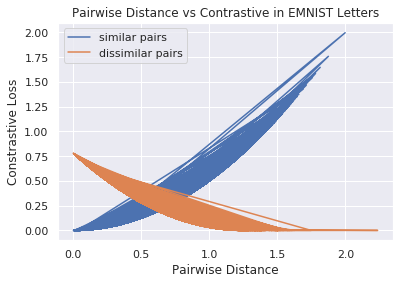

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:53: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:54: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:59: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a differe

Epoch :  2 Batch :  0 loss :  0.2465343177318573
Epoch :  2 Batch :  100 loss :  0.21997223794460297
Epoch :  2 Batch :  200 loss :  0.2256799042224884
Epoch :  2 Batch :  300 loss :  0.24863192439079285
Epoch :  2 Batch :  400 loss :  0.2538618743419647
Epoch :  2 Batch :  500 loss :  0.23286227881908417
Epoch :  2 Batch :  600 loss :  0.21679773926734924
Epoch :  2 Batch :  700 loss :  0.2216195911169052
Epoch :  2 Batch :  800 loss :  0.24504026770591736
Epoch :  2 Batch :  900 loss :  0.18902593851089478
Epoch :  2 Batch :  1000 loss :  0.23048752546310425
Epoch :  2 Batch :  1100 loss :  0.21053723990917206
Epoch :  2 Batch :  1200 loss :  0.22971394658088684
Epoch :  2 Batch :  1300 loss :  0.22633810341358185
Epoch :  2 Batch :  1400 loss :  0.23570109903812408
Epoch :  2 Batch :  1500 loss :  0.22420208156108856
Epoch 2 loss  0.24076972944327654


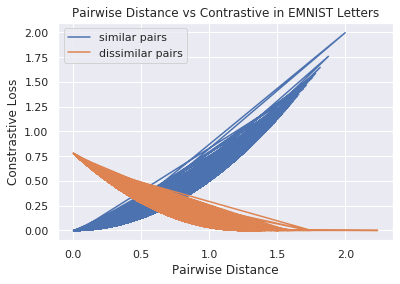

In [2]:
import torch.nn.functional as F
import torch
from torchvision.datasets import EMNIST
from torchvision import transforms
from torch.utils.data import Dataset
import matplotlib.pyplot as plt
import torch.optim as optim
import numpy as np
from torch.utils.data.sampler import SubsetRandomSampler
from argparse import ArgumentParser
import seaborn as sns; sns.set()
from SiamseNet import SimaseNet
from SimaseDataset import SiameseMNIST
import torch.nn  as nn



parser = ArgumentParser(description='Simase Network ')
parser.add_argument('--learning_batch_size', type=int, default=64)
parser.add_argument('--constractive_loss_margin', type=float, default=1.25)
parser.add_argument('--learning_rate', type=float, default=1e-3)
parser.add_argument('--num_epochs', type=int, default=2)
parser.add_argument('--weight_decay', type=float, default=1e-5)
parser.add_argument('--validation_split', type=float, default=0.2)
parser.add_argument('--mode', type=str, default='train')
parser.add_argument('--device', type=str, default='cuda')


args, unknown = parser.parse_known_args()

pwd_similiar = np.array([])
loss_similar = np.array([])

pwd_dis = np.array([])
loss_dis = np.array([])


class ContrastiveLoss(nn.Module):

    def __init__(self, margin):
        super(ContrastiveLoss, self).__init__()
        self.margin = margin


    def forward(self, output1, output2, target):
        eq_distance = F.pairwise_distance(output1, output2)
        np_target = target.numpy()
        np_distance = eq_distance.detach().numpy()
        #print(np_distance[[np.where(np_target == 0)]])

        global pwd_similiar, pwd_dis,loss_similar,loss_dis

        pwd_similiar = np.append(pwd_similiar, np_distance[[np.where(np_target == 0)]])
        pwd_dis = np.append(pwd_dis, np_distance[[np.where(np_target == 1)]])

        loss = 0.5 * (1 - target.float()) * torch.pow(eq_distance, 2) + \
               0.5 * target.float() * torch.pow(torch.clamp(self.margin - eq_distance, min=0.00), 2)
        np_loss = loss.detach().numpy()

        loss_similar = np.append(loss_similar, np_loss[[np.where(np_target == 0)]])
        loss_dis = np.append(loss_dis, np_loss[[np.where(np_target == 1)]])

        #print('shape ', ' similar distances', len(pwd_similiar),len(loss_similar))
        #print('shape ', ' dis distances', len(pwd_dis), len(loss_dis))

        return loss.mean()

def draw_plot():
    global pwd_similiar, pwd_dis,loss_similar,loss_dis
    plt.plot(pwd_similiar, loss_similar, label="similar pairs")
    plt.plot(pwd_dis, loss_dis, label="dissimilar pairs")
    plt.xlabel('Pairwise Distance')
    plt.ylabel('Constrastive Loss')
    plt.title('Pairwise Distance vs Contrastive in EMNIST Letters')
    plt.legend()
    plt.show()
    pwd_similiar = np.delete(pwd_similiar, [0,pwd_similiar.size-1])
    pwd_dis = np.delete(pwd_dis, [0,pwd_dis.size-1])
    loss_similar = np.delete(loss_similar, [0,loss_similar.size-1])
    loss_dis = np.delete(loss_dis, [0,loss_dis.size-1])

train_dataset = EMNIST('../data/EMNIST', train=True, download=True, split='letters',
                             transform = transforms.Compose([
                                 transforms.ToTensor()
                             ]))

test_dataset = EMNIST('../data/EMNIST', train=False, download=True, split='letters',
                            transform = transforms.Compose([
                                transforms.ToTensor()
                            ]))

siamese_train_dataset = SiameseMNIST(train_dataset)
split = int(np.floor(args.validation_split * len(siamese_train_dataset)))
indices = list(range(len(siamese_train_dataset)))
train_indices, val_indices = indices[split:], indices[:split]
train_sampler = SubsetRandomSampler(train_indices)
valid_sampler = SubsetRandomSampler(val_indices)

siamese_train_loader = torch.utils.data.DataLoader(siamese_train_dataset, batch_size = args.learning_batch_size,
                                                   sampler=train_sampler)
siamese_val_loader = torch.utils.data.DataLoader(siamese_train_dataset, batch_size = args.learning_batch_size,
                                                  sampler=valid_sampler)

simase_test_dataset = SiameseMNIST(test_dataset)
siamese_test_loader = torch.utils.data.DataLoader(simase_test_dataset, batch_size = 1, shuffle=True)


model = SimaseNet()
criterion = ContrastiveLoss(margin=args.constractive_loss_margin)
optimizer = optim.Adam(model.parameters(), lr=args.learning_rate, weight_decay=args.weight_decay)

train = True

if train:
    # training
    model.train()
    losses = []
    chunk = 100

    for epoch in range(1, args.num_epochs+1):

        for batch_idx, batch in enumerate(siamese_train_loader):

            img1, img2, target = batch

            optimizer.zero_grad()
            out1, out2 = model(img1, img2)
            loss = criterion(out1, out2, target)
            loss.backward()
            optimizer.step()

            if batch_idx % chunk == 0:
              print("Epoch : ", epoch, "Batch : " , batch_idx, "loss : ", loss.item())
            losses.append(loss.item())

        print("Epoch", epoch, "loss ", np.mean(losses))
        draw_plot()

    torch.save(model, 'simase.pth')

if not train:

        model = torch.load('simase.pth')
        model.eval()

        lss = []
        lds = []

        for batch_idx, data in enumerate(siamese_test_loader):
            img1, img2, target = data
            out1, out2 = model(img1, img2)
            eq = F.pairwise_distance(out1,out2)
            print(eq)

            #same =0
            if target == 0 :
                loss = criterion(out1, out2, target)
                print('loss',loss)
                lss.append(loss)
            else:
                loss = criterion(out1, out2, target)
                lds.append(loss)






